## Script for downloading Boundary Layer Height from ERA5
**Author:** Md. Kafioul Azam


In [20]:
import cdsapi
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time


In [21]:
# The region of interest (North, West, South, East)
REGION = [49.0, 6.0, 47.0, 8.0]  # Example: small box around Western Germany

# Dates for test download 
YEAR = "2024"
MONTH = "05"
DAYS = [f"{d:02d}" for d in range(1, 32)] 
# Variables to download
VARIABLES = [
    "boundary_layer_height",
    "2m_temperature",
    "2m_dewpoint_temperature",
    "10m_u_component_of_wind",
    "10m_v_component_of_wind",

    
]





In [22]:
# Output file name
OUTPUT_FILE = "era5_test_blh.nc"
def download_era5_single_levels(year, month, days, variables, region, target):
   
    c = cdsapi.Client()

    request_dict = {
        "product_type": "reanalysis",
        "variable": variables,
        "year": year,
        "month": month,
        "day": days,
        "time": [f"{h:02d}:00" for h in range(24)],
        "area": region,
        "format": "netcdf",
    }

    
    
    c.retrieve("reanalysis-era5-single-levels", request_dict, target)
    

    print(f"Download complete: {target}")
    


In [23]:

download_era5_single_levels(
        year=YEAR,
        month=MONTH,
        days=DAYS,
        variables=VARIABLES,
        region=REGION,
        target=OUTPUT_FILE
      )



2025-12-04 21:15:31,018 INFO [2025-12-03T00:00:00Z] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
2025-12-04 21:15:31,368 INFO Request ID is 2df9d969-ed82-46cd-a9be-87981a935af6
2025-12-04 21:15:31,433 INFO status has been updated to accepted
2025-12-04 21:15:39,937 INFO status has been updated to running
2025-12-04 21:15:45,364 INFO status has been updated to successful


1067b16f172548f3b011053d5bb00f11.nc:   0%|          | 0.00/747k [00:00<?, ?B/s]

Download complete: era5_test_blh.nc


In [24]:

import xarray as xr
ds = xr.open_dataset(OUTPUT_FILE)
if "valid_time" in ds.dims:
    ds = ds.rename({"valid_time": "time"})
ds
print("Variables in dataset:")
for var in ds.data_vars:
     print(f" - {var}: {ds[var].attrs.get('long_name', '')}")

Variables in dataset:
 - blh: Boundary layer height
 - t2m: 2 metre temperature
 - d2m: 2 metre dewpoint temperature
 - u10: 10 metre U wind component
 - v10: 10 metre V wind component


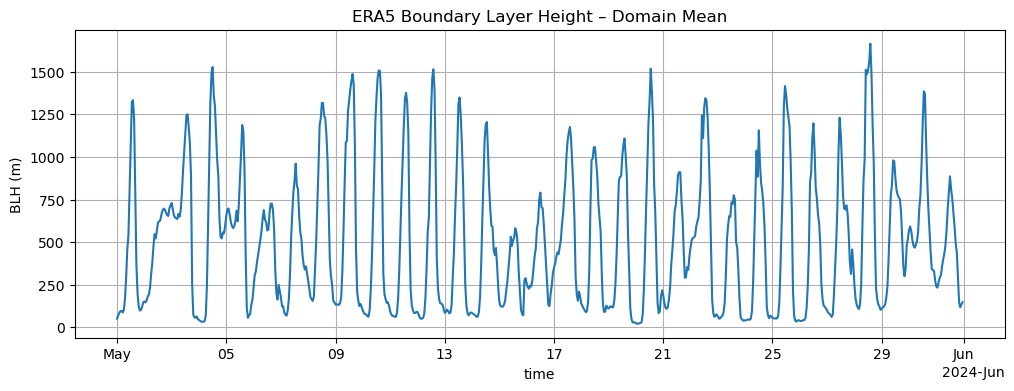

In [25]:

blh = ds["blh"].mean(dim=["latitude", "longitude"])
blh.plot(figsize=(12,4))
plt.title("ERA5 Boundary Layer Height – Domain Mean")
plt.ylabel("BLH (m)")
plt.grid(True)
plt.show()


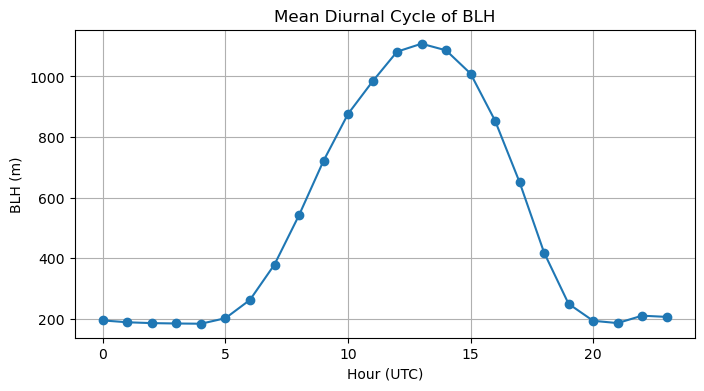

In [27]:

blh_hourly = blh.groupby("time.hour").mean()
blh_hourly.plot(marker="o", figsize=(8,4))
plt.title("Mean Diurnal Cycle of BLH")
plt.xlabel("Hour (UTC)")
plt.ylabel("BLH (m)")
plt.grid(True)
plt.show()


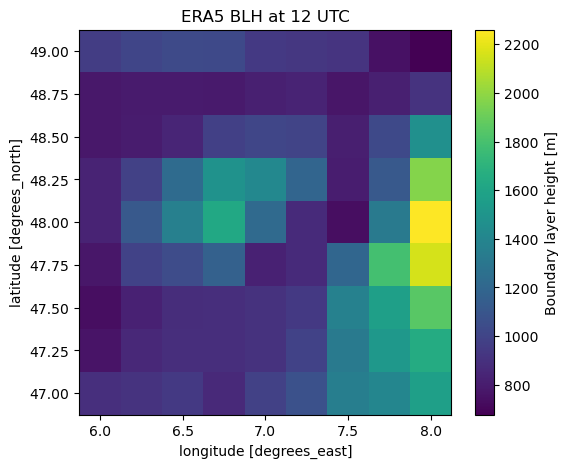

In [28]:

hour0 = ds.isel(time=12)
plt.figure(figsize=(6,5))
hour0["blh"].plot()
plt.title("ERA5 BLH at 12 UTC")
plt.show()
